<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png" alt="USA" width=700>

# Regresion Lineal

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools
plt.style.use('ggplot')

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
plt.style.use('fivethirtyeight')

In [5]:
import zipfile
with zipfile.ZipFile('data/houses_portland.csv.zip', 'r') as z:
    f = z.open('houses_portland.csv')
    data = pd.io.parsers.read_table(f, sep=',')
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
data.columns

Index(['area', 'bedroom', ' price'], dtype='object')

Text(0, 0.5, 'Price')

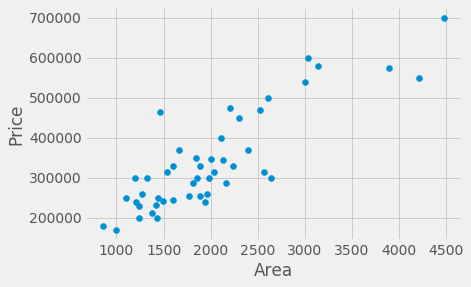

In [7]:
y = data[' price'].values
X = data['area'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')

## Normalizar Datos

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

Text(0, 0.5, 'Price')

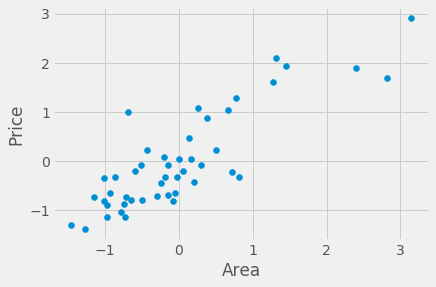

In [8]:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')

## Forma de la regresion lineal

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ es la respuesta
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (la primera feature)
- $\beta_n$ es el coeficiente para $x_n$ (La enesima feature)

Los $\beta$ son los **coeficientes del modelo**

- Estos valores se estiman (o "aprenden") durante el proceso de ajuste del modelo utilizando el ** criterio de mínimos cuadrados **.
- Específicamente, encontramos la línea (matemáticamente) que minimiza la ** suma de residuos cuadrados ** (o "suma de errores cuadrados").
- Y una vez que hayamos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.

![Estimating coefficients](img/estimating_coefficients.png)

En el diagrama de arriba:

- Los puntos negros son los **valores observados** de xey.
- La línea azul es nuestra **línea de mínimos cuadrados**.
- Las líneas rojas son los **residuales**, que son las distancias verticales entre los valores observados y la línea de mínimos cuadrados.

### Función de coste

El objetivo fue estimar los parámetros $ \ beta $ que minimizan la suma de los residuos al cuadrado

## $$J(\beta_0, \beta_1)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

In [9]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

Supongamos las siguientes betas

In [10]:
beta_ini = np.array([-1, 1])

In [11]:
# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

Text(0, 0.5, 'Price')

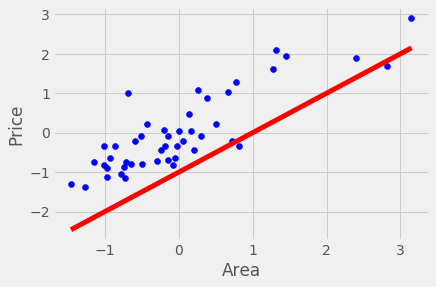

In [12]:
# scatter plot
plt.scatter(X, y,c='b')

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Area')
plt.ylabel('Price')

Con su error

In [13]:
# Cost function
def lr_cost_func(beta, x, y):
    # Can be vectorized
    res = 0
    for i in range(x.shape[0]):
        res += (lr_h(beta,x[i, :]) - y[i]) ** 2
    res *= 1 / (2*x.shape[0])
    return res
lr_cost_func(beta_ini, X_, y)

0.6450124071218748

### Comprender la función de costos

Veamos cómo se ve la función de costo para diferentes valores de $ \ beta $

In [14]:
beta0 = np.arange(-15, 20, 1)

beta1 = 2

Text(0, 0.5, 'J(beta)')

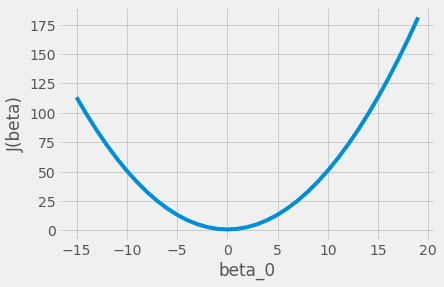

In [15]:
cost_func=[]
for beta_0 in beta0:
    cost_func.append(lr_cost_func(np.array([beta_0, beta1]), X_, y) )

plt.plot(beta0, cost_func)
plt.xlabel('beta_0')
plt.ylabel('J(beta)')


También se puede ver como un gráfico de contorno.

Text(0, 0.5, 'beta_1')

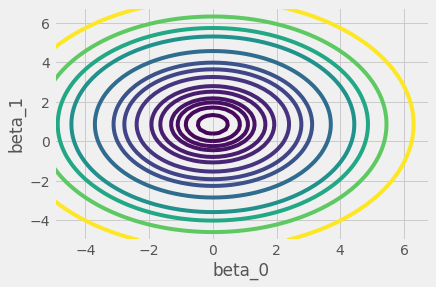

In [22]:
contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 12, 15, 20]
plt.contour(beta0, beta1, cost_func.T.values, contour_levels)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

Entendamos cómo se observan los diferentes valores de betas en el gráfico de contorno

In [23]:
betas = np.array([[0, 0],
                 [-1, -1],
                 [-5, 5],
                 [3, -2]])

In [24]:
plt.style.use('seaborn-notebook')



Linear Regression with betas  [0 0]


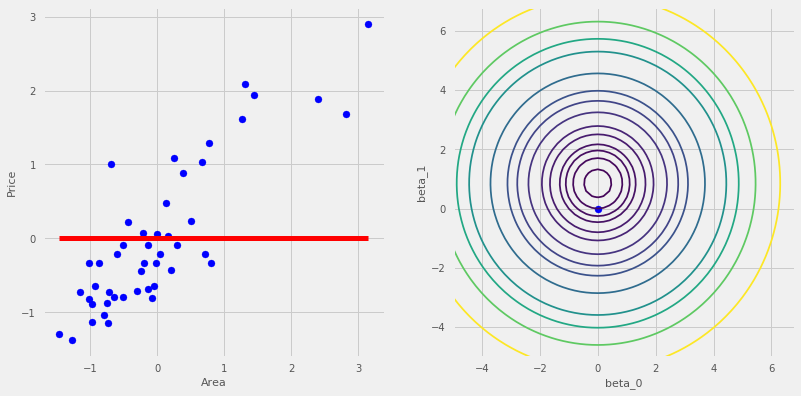



Linear Regression with betas  [-1 -1]


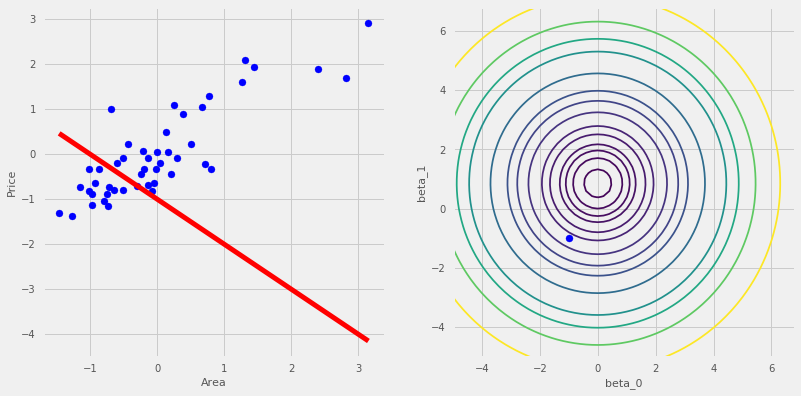



Linear Regression with betas  [-5  5]


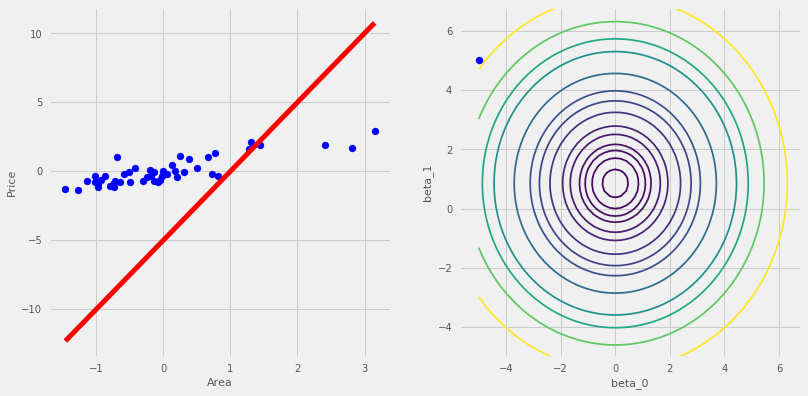



Linear Regression with betas  [ 3 -2]


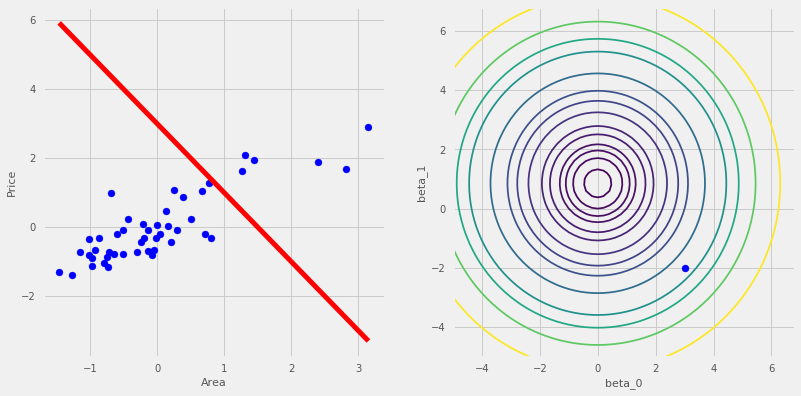

In [25]:
for beta in betas:
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1],c='b', s=50)

    # scatter plot
    ax1.scatter(X, y,c='b')

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()


## Descenso de gradiente

Al tener alguna función $J(\beta_0, \beta_1)$

se busca minimizar $\min_{\beta_0, \beta_1}J(\beta_0, \beta_1)$


Proceso:

* Empiece con unos $\beta_0, \beta_1 $

* Sigue cambiando $ \beta_0, \beta_1 $ para reducir $ J (\beta_0, \beta_1) $
hasta que con suerte termine en un mínimo

### Algoritmo de descenso de gradiente

Repita hasta la convergencia {

## $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1)$$


}

mientras actualiza simultáneamente j = 0 y j = 1

$\alpha$ se denomina tasa de aprendizaje


Para el caso particular de regresión lineal con una variable y una intersección, el gradiente se calcula como:


### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)^2$$

### $ j = 0: \frac{\partial }{\partial \beta_0} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ j = 1: \frac{\partial }{\partial \beta_1} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$


### Algoritmo de descenso de gradiente

Repita hasta la convergencia {

### $ \beta_0 := \beta_0- \alpha  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ \beta_1 := \beta_1- \alpha   \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$
}

Simultaneamente


### Calcular gradiente

In [26]:

beta_ini = np.array([-1.5, 0.])

def gradient(beta, x, y):
    # Not vectorized
    gradient_0  = 1 / x.shape[0] * ((lr_h(beta, x) - y).sum())
    gradient_1  = 1 / x.shape[0] * ((lr_h(beta, x) - y)* x[:, 1]).sum()

    return np.array([gradient_0, gradient_1])

gradient(beta_ini, X_, y)

array([-1.5       , -0.85498759])

### Algoritmo de descenso de gradiente

In [27]:
def gradient_descent(x, y, beta_ini, alpha, iters): 
    betas = np.zeros((iters, beta_ini.shape[0] + 1))

    beta = beta_ini
    for iter_ in range(iters):

        betas[iter_, :-1] = beta
        betas[iter_, -1] = lr_cost_func(beta, x, y)
        beta -= alpha * gradient(beta, x, y)
        
    return betas

In [28]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  gradient_descent(X_, y, beta_ini, alpha, iters)

Evolucion de la funcion de costo por iteracion

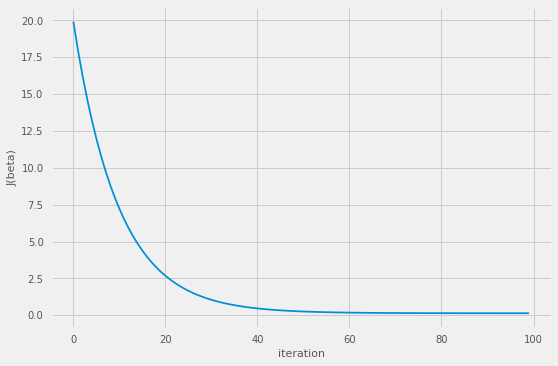

In [29]:
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)');

Viendo por iteracion



Linear Regression with betas  [-4. -4.]


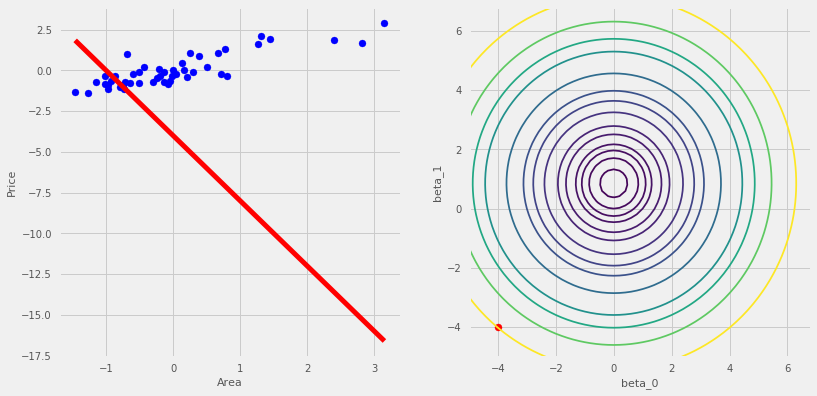



Linear Regression with betas  [-2.39494776 -2.05187282]


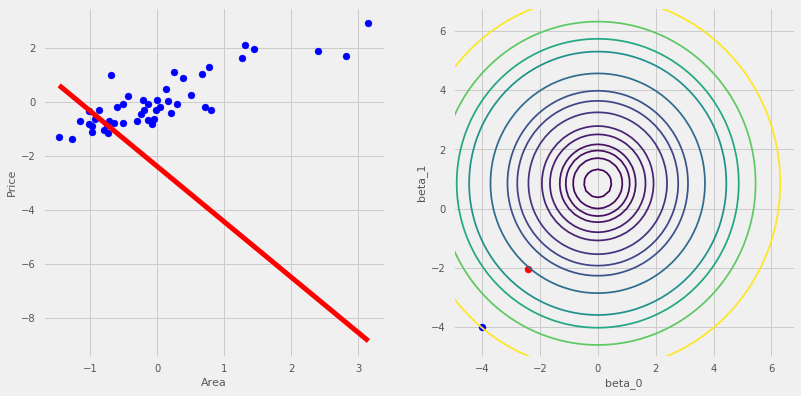



Linear Regression with betas  [-1.43394369 -0.88545711]


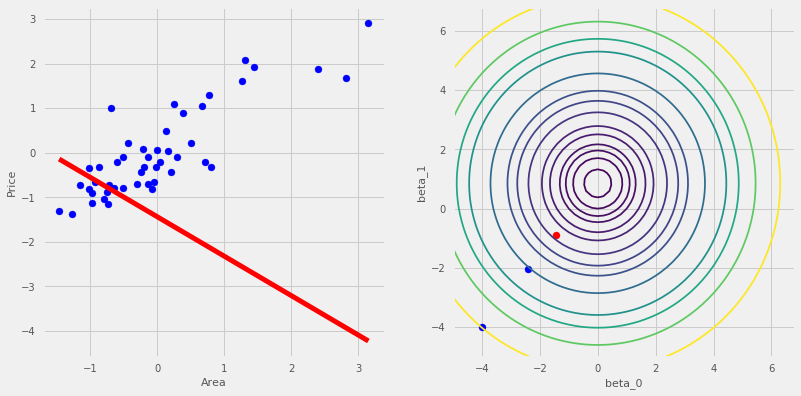



Linear Regression with betas  [-0.85855506 -0.18708094]


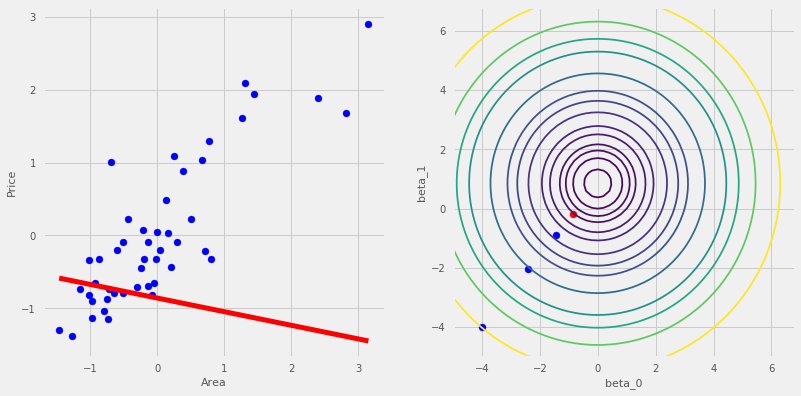



Linear Regression with betas  [-0.51404863  0.23106267]


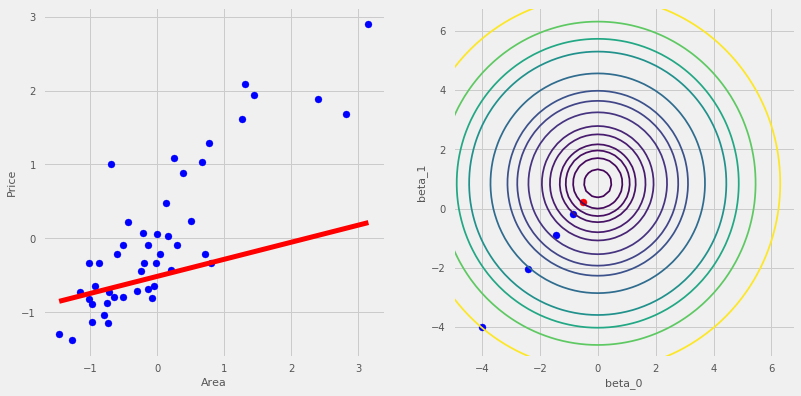



Linear Regression with betas  [-0.3077799   0.48142069]


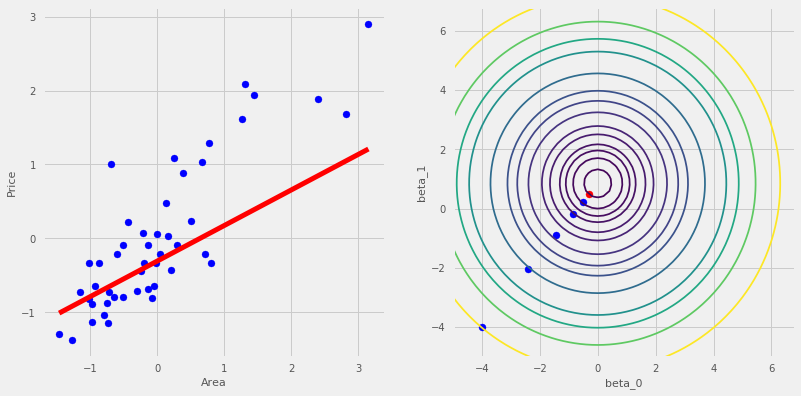



Linear Regression with betas  [-0.1842792   0.63131929]


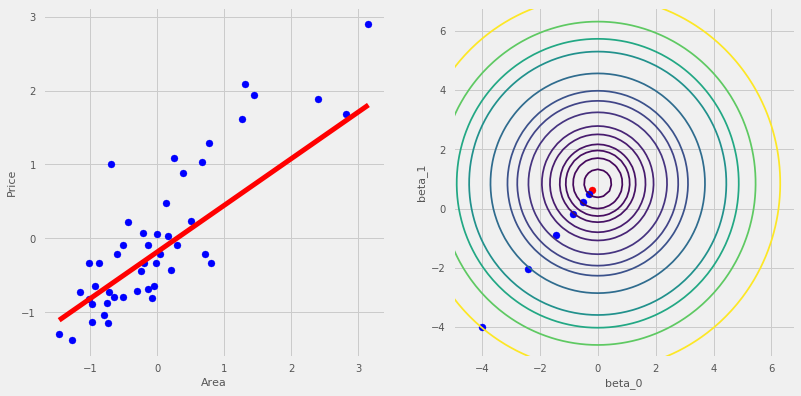



Linear Regression with betas  [-0.11033476  0.72106912]


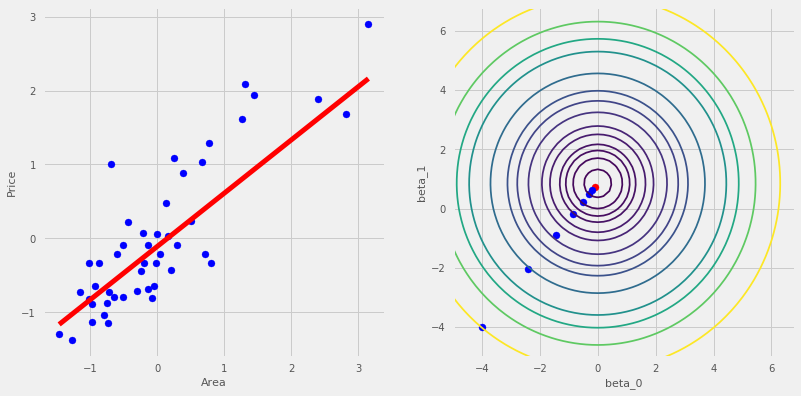



Linear Regression with betas  [-0.0660615   0.77480566]


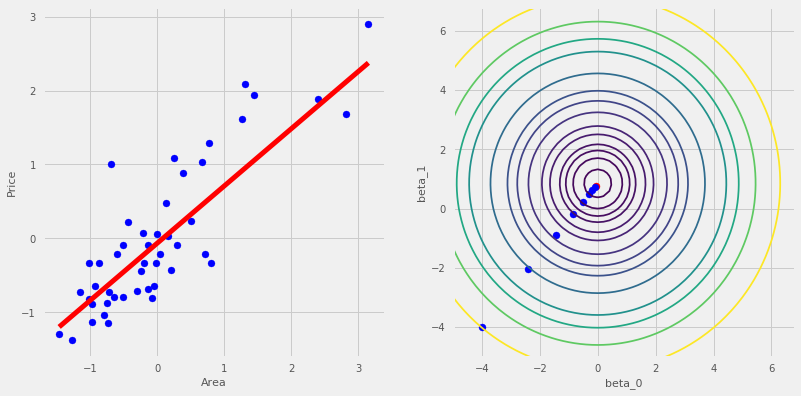



Linear Regression with betas  [-0.03955346  0.8069797 ]


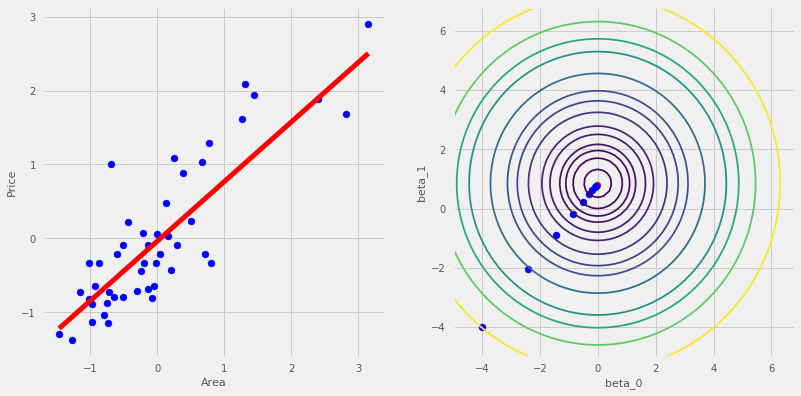

In [30]:
betas_ = betas[range(0, iters, 10), :-1]
for i, beta in enumerate(betas_):
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], c='r', s=50)
    
    if i > 0:
        for beta_ in betas_[:i]:
            ax2.scatter(beta_[0], beta_[1], c='b', s=50)

    # scatter plot
    ax1.scatter(X, y,c='b')

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

Betas Estiamados

In [31]:
betas[-1, :-1]

array([-0.02492854,  0.82473065])

## Ecuaciones Normales

## $$ \beta = (X^T X)^{-1} X^T Y $$


In [32]:
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))

In [33]:
beta

array([-5.80624192e-17,  8.54987593e-01])

# Estimacion de la Regresion

### Usando OLS

In [34]:
# import
from sklearn.linear_model import LinearRegression

In [35]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [36]:
# Fit
linreg.fit(X_, y)

LinearRegression(fit_intercept=False)

In [37]:
linreg.coef_

array([-9.71656032e-17,  8.54987593e-01])

### Uso de gradiente descendente (estocástico) *

* Se diferencia del descenso de gradiente normal actualizando los pesos con cada ejemplo. Esto converge más rápido para grandes conjuntos de datos

In [38]:
# import
from sklearn.linear_model import SGDRegressor

In [39]:
# Initialize
linreg2 = SGDRegressor(fit_intercept=False, max_iter=100)

In [40]:
# Fit
linreg2.fit(X_,y)

SGDRegressor(fit_intercept=False, max_iter=100)

In [41]:
linreg2.coef_

array([7.29161085e-04, 7.85721484e-01])

# Comparando OLS y GD

| Descenso del gradiente | Ecuación normal |
| : ------------- | : ------------- |
| Necesito elegir $\alpha $ | No es necesario elegir $\alpha $ |
| Necesita muchas iteraciones | No es necesario iterar |
| Funciona bien incluso cuando $ k $ es grande | Lento si $ k $ es muy grande |
|| Necesito calcular $ (X ^ TX) ^ {- 1} $ |

# Regresion multiple

In [42]:
data['area2'] = data['area'] ** 2
data.head()

,area,bedroom,price,area2
0,2104,3,399900,4426816
1,1600,3,329900,2560000
2,2400,3,369000,5760000
3,1416,2,232000,2005056
4,3000,4,539900,9000000


 * n = n_muestras = numero de elementos de entrenamiento
 * k = numero de features
 * y = price
 * $x^{(i)}$ = features del elemento $i$

In [43]:
i = 2
data.loc[2, ['area', 'area2']]

area        2400
area2    5760000
Name: 2, dtype: int64

* $x_j^{(i)}$ = valor del feature $j$ del elemento $i$

In [44]:
i = 2
j = 2
data.loc[2, 'area2']

5760000

### Hipotesis:

* Previemente:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 $$

where $x_1$ = area

* Ahora:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

### Escalar la Matriz X

In [45]:
X = data[['area', 'area2']].values
X[0:5]

array([[   2104, 4426816],
       [   1600, 2560000],
       [   2400, 5760000],
       [   1416, 2005056],
       [   3000, 9000000]], dtype=int64)

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([2.00068085e+03, 4.62083843e+06]),
 array([7.86202619e+02, 4.05394589e+06]))

In [47]:
X[0:5]

array([[ 0.13141542, -0.04786014],
       [-0.5096407 , -0.50835371],
       [ 0.5079087 ,  0.28100069],
       [-0.74367706, -0.64524355],
       [ 1.27107075,  1.08022201]])

In [48]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.13141542, -0.04786014],
       [ 1.        , -0.5096407 , -0.50835371],
       [ 1.        ,  0.5079087 ,  0.28100069],
       [ 1.        , -0.74367706, -0.64524355],
       [ 1.        ,  1.27107075,  1.08022201]])


### Función de coste

El objetivo fue estimar los parámetros $ \beta $ que minimizan la suma de los residuos al cuadrado

### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x^{(i)})-y_i)^2$$


### $$h_\beta(x^{(i)}) = \sum_{j=0}^k \beta_j  x_j^{(i)}$$


### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n \left( \left( \sum_{j=0}^k \beta_j  x_j^{(i)}\right) -y_i \right)^2$$

Tenga en cuenta que $ x ^ 0 $ se refiere a la columna de unos

### Algoritmo de descenso de gradiente

Repita hasta la convergencia {

### $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta)$$


}


mientras se actualiza simultáneamente j = 0..k

$ \alpha $ se denomina tasa de aprendizaje

In [49]:
beta_ini = np.array([0., 0., 0.])

# gradient calculation
def gradient(beta, x, y):
    return 1 / x.shape[0] * np.dot((lr_h(beta, x) - y).T, x)

gradient(beta_ini, X_, y)

array([ 8.50383593e-17, -8.54987593e-01, -8.33162685e-01])

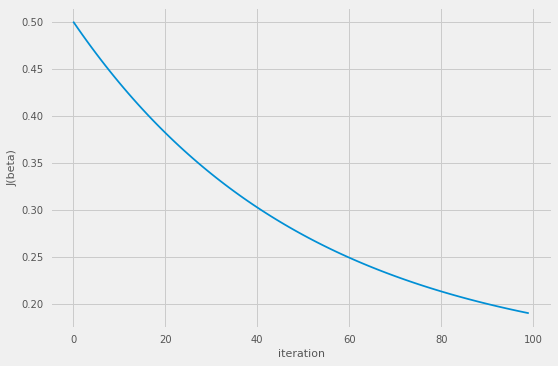

In [50]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.005
iters = 100
betas = gradient_descent(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)');


Aparentemente, la función de costos no está convergiendo

Cambiemos alfa y aumentemos el número de iteraciones

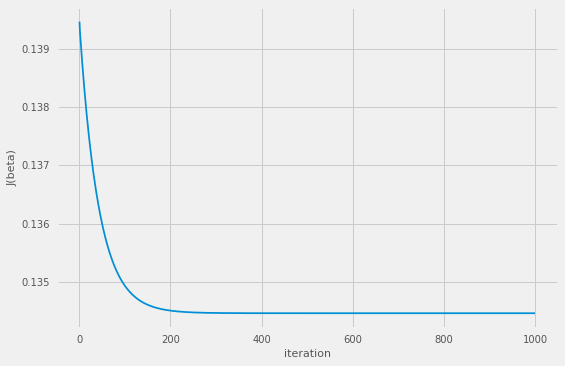

In [51]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.5
iters = 1000
betas = gradient_descent(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(1,iters), betas[1:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)');

In [52]:
print('betas con gradiente descendente\n', betas[-1, :-1])

betas con gradiente descendente
 [-7.91329177e-17  8.91147493e-01 -3.70307030e-02]


### Usando OLS

In [53]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([-7.26814831e-17,  8.91150925e-01, -3.70341353e-02])

Diferencia

In [55]:
betas_ols - betas[-1, :-1]

array([ 6.45143463e-18,  3.43234289e-06, -3.43234289e-06])


# Haciendo predicciones

Predecir el precio cuando el área es 3000

Nota: recuerde que la matriz X está escalada

In [56]:
x = np.array([3000., 3000.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[1.        , 1.27107075, 1.08022201]])

In [57]:
y_pred = lr_h(betas_ols, x_)
y_pred

array([1.09271078])

In [58]:
y_pred = y_pred * y_std + y_mean
y_pred

array([475583.75451797])

# Usando sklearn

In [59]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf2 = SGDRegressor(max_iter=10000)


Cuando se usa sklearn, no es necesario crear la intersección

In [60]:
clf1.fit(data[['area', 'area2']], data[' price'])

LinearRegression()

In [61]:
clf2.fit(X, y)

SGDRegressor(max_iter=10000)

Predicciones

In [62]:
clf1.predict(x.reshape(1, -1))

array([475583.75451797])

In [63]:
clf2.predict(x_scaled.reshape(1, -1)) * y_std + y_mean

array([461662.37147425])

# Métricas de evaluación para problemas de regresión

Las métricas de evaluación para problemas de clasificación, como ** precisión **, no son útiles para problemas de regresión. Necesitamos métricas de evaluación diseñadas para comparar ** valores continuos **.

Aquí hay tres métricas de evaluación comunes para problemas de regresión:

**Error absoluto medio** (MAE) es la media del valor absoluto de los errores:

$$ \frac 1n \sum_ {i = 1} ^ n | y_i- \hat {y} _i | $$

**Error cuadrático medio** (MSE) es la media de los errores cuadráticos:

$$ \frac 1n \sum_ {i = 1} ^ n (y_i- \hat {y} _i) ^ 2 $$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt {\frac 1n \sum_ {i = 1} ^ n (y_i- \hat {y} _i) ^ 2} $$

In [64]:
y_pred = clf1.predict(data[['area', 'area2']])

In [65]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(data[' price'], y_pred))
print('MSE:', metrics.mean_squared_error(data[' price'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(data[' price'], y_pred)))

MAE: 51990.96151069319
MSE: 4115290102.059942
RMSE: 64150.52690399309


Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE se puede interpretar en las unidades "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

# Comparación de regresión lineal con otros modelos

Ventajas de la regresión lineal:

- Sencillo de explicar
- Altamente interpretable
- El entrenamiento y la predicción de modelos son rápidos
- No se requiere ajuste (excluyendo regularización)
- Las funciones no necesitan escala
- Puede funcionar bien con una pequeña cantidad de observaciones.
- Bien entendido

Desventajas de la regresión lineal:

- Presume una relación lineal entre las características y la respuesta.
- El rendimiento (generalmente) no es competitivo con los mejores métodos de aprendizaje supervisado debido a un alto sesgo
- No se pueden aprender automáticamente las interacciones de las funciones